<center><h1> graphical results for IRC robustness </h1></center>
<center><h2> $\mu(F)$ : $2/4 \rightarrow 2/3 \rightarrow 1$ </h2></center>

---

## Check the following before running the code

### (a) Read "Read_Me_First.pdf" first, which introduces the package

### (b) Before replication, delete all .p files in the "./numerical_result" folder. The .p files record the numerical results of the our computation.

### (c) To avoid confusion, reset your kernel before you running the notebook (to clear memory): Menu "Kernel" $\rightarrow$ "Restart Kernel and clear all outputs".

### (d) To evaluate the code for simulation replication,
* <font size="4.5"> click : Menu "Kernel" $\rightarrow$ "Restart Kernel and Run All Cells" </font>
* <font size="4.5"> or, select a cell of code, press "shift" and "enter". Run all cells to avoid errors </font>

### (e) Check "joblib", "scikit-learn", "numpy", "matplotlib" and "tqdm" are installed. If not,
* <font size="4.5"> run "pip install joblib scikit-learn numpy matplotlib tqdm" in terminal (Mac OS or Linux) or command prompt as administrator (Windows) if you use Python3 without any IDE. </font>
* <font size="4.5"> we highly recommend installing Anaconda3 version 2020-11 directly to avoid package management (all packages mentioned above are installed by default).</font>

---

## #1: import all modules

* <font size="4.5"> "pickle" is used to save all computation results into ".p" files, which can be loaded later. </font>

* <font size="4.5"> For simplicity and elegancy, all relevant functions and classes are coded in "simul_plot_ic.py". </font>

In [1]:
%reset -f

import numpy                as np
import matplotlib.pyplot    as plt
import pickle
import os
import errno

from pathlib            import Path
from simul_plot_ic import simul_plot

---

## #2: define all functions

* <font size="4.5"> in this simulation, we use CV-lars-lasso (lasso solved by CV-lars) and CV-cd (lasso solved by warm-start cylindrical coordinate descent) as the competitors </font>

## #2(a): compute of the solar, cv-lars and cv-cd and plot the results

In [2]:
def func_simul(sample_size, n_dim, n_info, coef_1, coef_2, n_repeat, num_rep, step_size, rnd_seed, plot_on, repro):
  
    #set random seed
    np.random.seed(rnd_seed)

    #call function from the class
    trial = simul_plot(sample_size, n_dim, n_info, coef_1, coef_2, n_repeat, num_rep, step_size, rnd_seed, plot_on)

    #define the pickle file name
    pkl_file = "./numerical_result/solar_graph_ic_"+str(np.round(coef_1,2))+".p"

    if repro == True:

        print("compute the simulation with sample size "+str(sample_size)+" and number of variables "+str(n_dim))

        #compute the result
        opt_c_stack, Q_opt_c_stack, la_array_stack, la_var_stack, solar_coef_stack, abs_ic_stack, cd_array_stack, cd_var_stack = trial.simul_func()

        #create the subdirectory if not existing
        if not os.path.exists(os.path.dirname(pkl_file)):
            try:
                os.makedirs(os.path.dirname(pkl_file))
            # Guard against race condition
            except OSError as exc: 
                if exc.errno != errno.EEXIST:
                    raise

        with open(pkl_file, "wb") as f:
            pickle.dump( opt_c_stack      , f)
            pickle.dump( Q_opt_c_stack    , f)
            pickle.dump( la_array_stack   , f)
            pickle.dump( la_var_stack     , f)
            pickle.dump( solar_coef_stack , f)
            pickle.dump( cd_array_stack   , f)
            pickle.dump( cd_var_stack     , f)
            pickle.dump( abs_ic_stack     , f)

    else:

        with open(pkl_file, "rb") as f:
            opt_c_stack      = pickle.load( f )
            Q_opt_c_stack    = pickle.load( f )
            la_array_stack   = pickle.load( f )
            la_var_stack     = pickle.load( f )
            solar_coef_stack = pickle.load( f )
            cd_array_stack   = pickle.load( f )
            cd_var_stack     = pickle.load( f )
            abs_ic_stack     = pickle.load( f )
    
    if not os.path.exists("figure"):
        os.mkdir("figure")

    #plot the hist of number of variables selected of solar, cv-lars-lasso and cv-cd
    trial.vari_hist(Q_opt_c_stack, la_array_stack, cd_array_stack)

    #plot the optimal q value for all num_rep solar repeatations
    trial.q_hist(opt_c_stack)

    #plot the probability of each variable be selected by solar, cv-lars-lasso and cv-cd
    print_true_1 = False
    print_true_2 = True

    num_var_to_plot_1 = 15
    ##this is the maximum number of variables that can be plot in one graph

    trial.acc_plot(Q_opt_c_stack, la_var_stack, cd_var_stack, 20, print_true_1)
    trial.acc_plot(Q_opt_c_stack, la_var_stack, cd_var_stack, 20, print_true_2)
    trial.bl_vari_plot(solar_coef_stack, num_var_to_plot_1)

---

## #3(a): define inputs values

| <font size="4.5"> variable name </font> | <font size="4.5">  meaning </font> |
|-|-|
| <font size="4.5">  sample_size  </font> | <font size="4.5">  the sample size $n$ in the paper; </font>| 
| <font size="4.5">  n_dim        </font> | <font size="4.5">  the number of variables (informative + redundant) in $X$, $p$ in the paper; </font>| 
| <font size="4.5">  n_info       </font> | <font size="4.5">  the number of informative variables in $X$; </font>| 
| <font size="4.5">  n_repeat     </font> | <font size="4.5">  the number of subsamples generated by solar; </font>| 
| <font size="4.5">  num_rep      </font> | <font size="4.5">  the total repetition number of this simulation; </font>|
| <font size="4.5">  step_size    </font> | <font size="4.5">  the step size for tuning $c$; </font>| 
| <font size="4.5">  rnd_seed     </font> | <font size="4.5">  the random seed value; </font>| 
| <font size="4.5">  coef_1     </font> | <font size="4.5">  the value of $\omega_1$ (in the data generation process of $\mathbf{x}_5$); </font>| 
| <font size="4.5">  coef_2     </font> | <font size="4.5">  the value of $\omega_2$ (in the data generation process of $\mathbf{x}_5$); </font>| 

## #3(b): define DGP

* <font size="4.5"> the population regression equation is $$Y = 2\cdot \mathbf{x}_0 + 3\cdot \mathbf{x}_1 + 4\cdot \mathbf{x}_2 + 5\cdot \mathbf{x}_3 + 6\cdot \mathbf{x}_4  + u,$$ and $$ \mathbf{x}_5 = \omega_1 \cdot \mathbf{x}_0 + \omega_2 \cdot \mathbf{x}_1 + \sqrt{1 - \omega_1^2 - \omega_2^2} \cdot e,$$
* <font size="4.5"> To change the simulation settings, simply change the input values. If you change *n_info* you will adjust the DGP as follows: </font>
    * <font size="4.5"> If $i > \mbox{n_info} - 1$ and $i \in \left[ 0, 1, 2, \ldots, p-1 \right]$, $\beta_i = 0$ in population;</font>
    * <font size="4.5"> If $i \leqslant \mbox{n_info} - 1$ and $i \in \left[ 0, 1, 2, \ldots, p-1 \right]$, $\beta_i = i + 2$ in population</font>

In [3]:
sample_size = 200
n_dim       = 50
n_info      = 5 
step_size   = -0.02 
n_repeat    = 3
num_rep     = 200
rnd_seed    = 0

coef_1_0 = 1/4
coef_2_0 = 1/4

coef_1_1 = 1/3
coef_2_1 = 1/3

coef_1_2 = 1/2
coef_2_2 = 1/2

## If you want to save the plots and tables locally, please change the *plot_on* value to True

In [4]:
plot_on = False

* <font size="5"> If you want to replicate the result, set the "repro" value to True; </font>
* <font size="5"> *repro=True* will report our result saved at ".p" files; </font>

In [5]:
repro = True

---

## #4: compute solar, CV-lars-lasso and CV-cd

### This applies for replication only (numerical results will be saved as .p files) and can be skipped if you have already computed simulation results.

### Numpy, sklearn and python are actively updated. If you use different version, replication results may be slightly different from the paper (see Read_me_first.pdf for detail).

### To rerun this part, first delete all .p files in your working folder to avoid possible bug.

## case #1: $\frac{1}{4} \mathbf{x}_0 + \frac{1}{4} \mathbf{x}_1 + \sqrt{\frac{7}{8}} \mathbf{\gamma}= \mathbf{x}_5$

### plot the results

<font size="4.5"> The available results are: </font>

* <font size="4.5"> histogram of number of variables selected by solar, CV-cd and CV-lars-lasso; </font>
* <font size="4.5"> histogram of optimal $c$ value for $\left\{ \mathbf{x}_j \; \vert \; \widehat{q}_j \geqslant c \right\}$ in all 200 repetitions of solar computation on different samples; </font>
* <font size="4.5"> probability of selecting each redundant variable in solar, CV-cd and CV-lars-lasso (top 15 by probability); </font>
* <font size="4.5"> probability of selecting each informative variable in solar, CV-cd and CV-lars-lasso; </font>
* <font size="4.5"> the boxplot of regression coefficients of solar (top 15 means); </font>

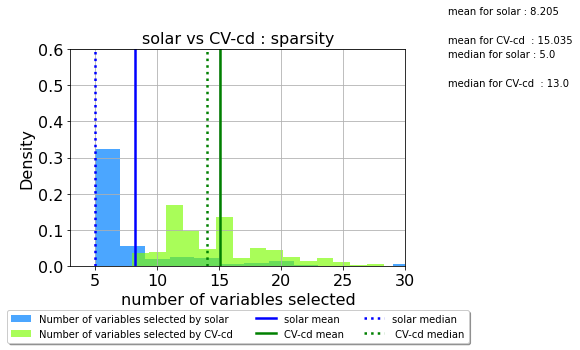

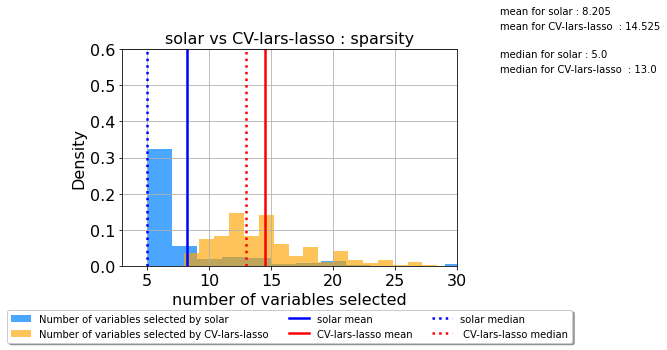

in 95 out of 200 solar pick more/less than 5 variables
in 200 out of 200 CV-lars-lasso  pick more/less than 5 variables
in 200 out of 200 CV-cd pick more/less than 5 variables


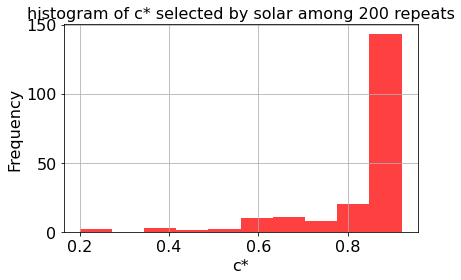

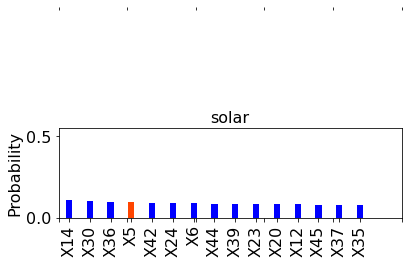

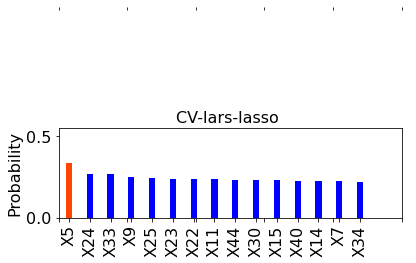

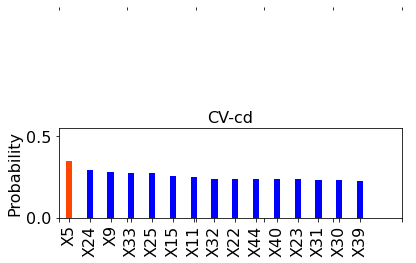

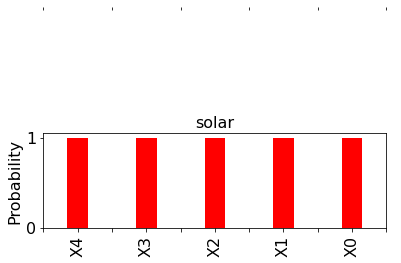

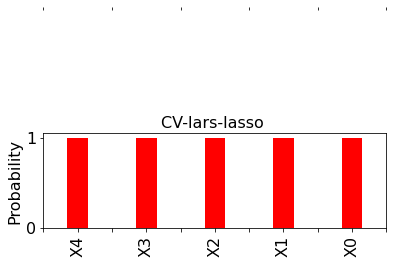

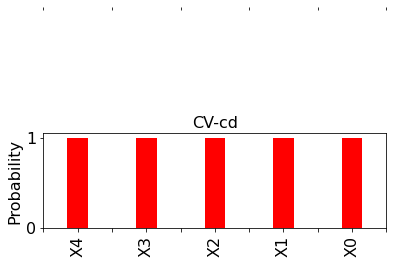

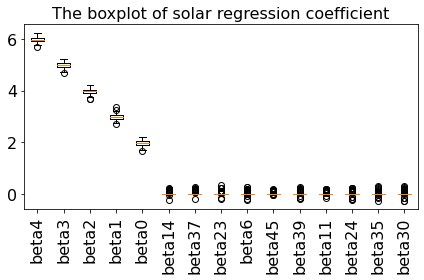

the number of non-zeros in the boxplot of beta_0:  200
the number of non-zeros in the boxplot of beta_1:  200
the number of non-zeros in the boxplot of beta_2:  200
the number of non-zeros in the boxplot of beta_3:  200
the number of non-zeros in the boxplot of beta_4:  200


In [6]:
func_simul(sample_size, n_dim, n_info, coef_1_0, coef_2_0, n_repeat, num_rep, step_size, rnd_seed, plot_on, repro)

## case #2: $\frac{1}{3} \mathbf{x}_0 + \frac{1}{3} \mathbf{x}_1 + \sqrt{\frac{7}{9}} \mathbf{\gamma}= \mathbf{x}_5$

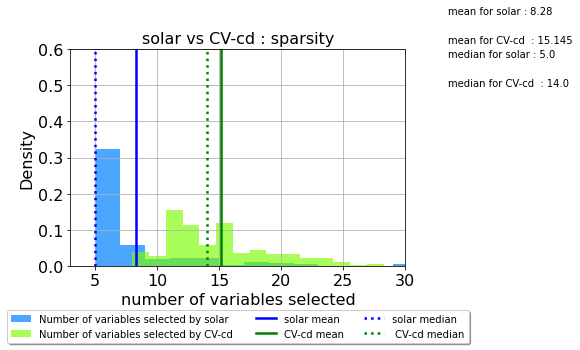

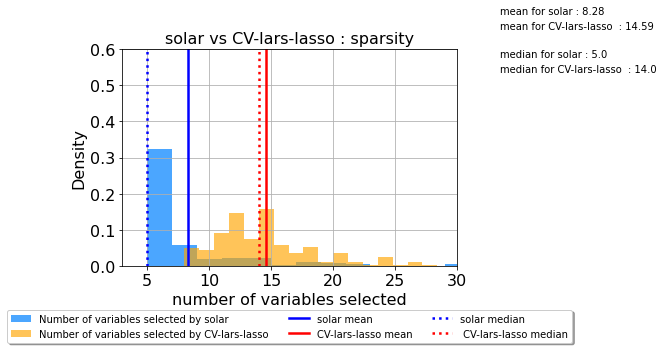

in 92 out of 200 solar pick more/less than 5 variables
in 200 out of 200 CV-lars-lasso  pick more/less than 5 variables
in 200 out of 200 CV-cd pick more/less than 5 variables


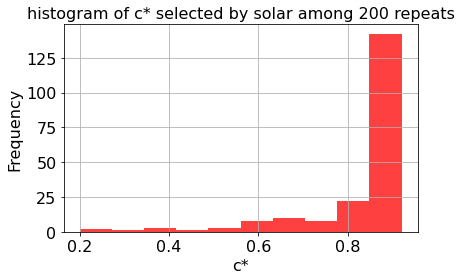

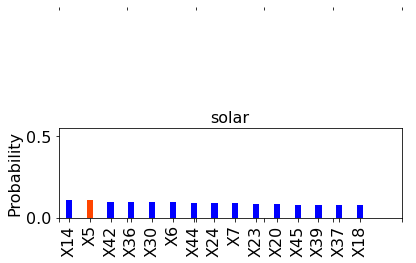

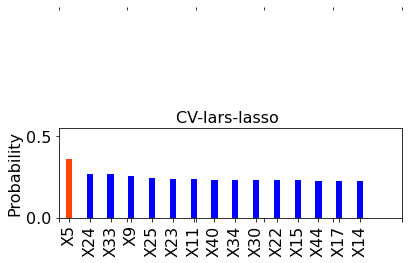

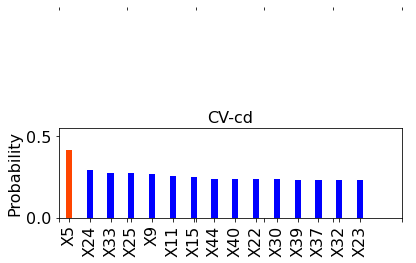

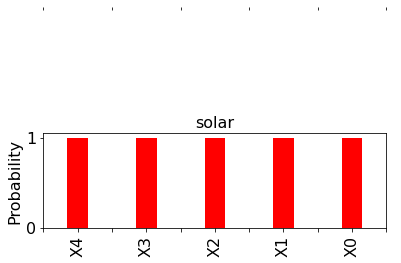

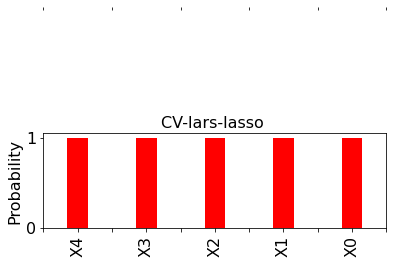

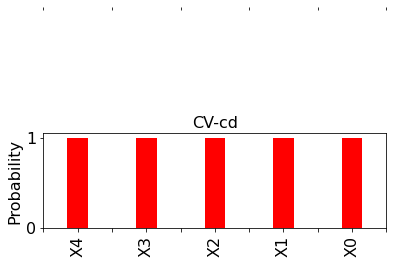

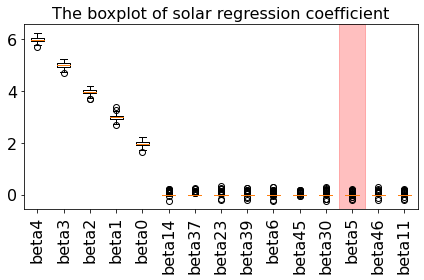

the number of non-zeros in the boxplot of beta_0:  200
the number of non-zeros in the boxplot of beta_1:  200
the number of non-zeros in the boxplot of beta_2:  200
the number of non-zeros in the boxplot of beta_3:  200
the number of non-zeros in the boxplot of beta_4:  200


In [7]:
func_simul(sample_size, n_dim, n_info, coef_1_1, coef_2_1, n_repeat, num_rep, step_size, rnd_seed, plot_on, repro)

## case #3: $\frac{1}{2} \mathbf{x}_0 + \frac{1}{2} \mathbf{x}_1 + \sqrt{ \frac{1}{2} } \mathbf{\gamma}= \mathbf{x}_5$

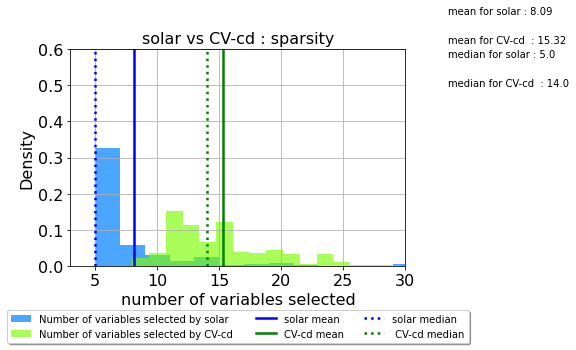

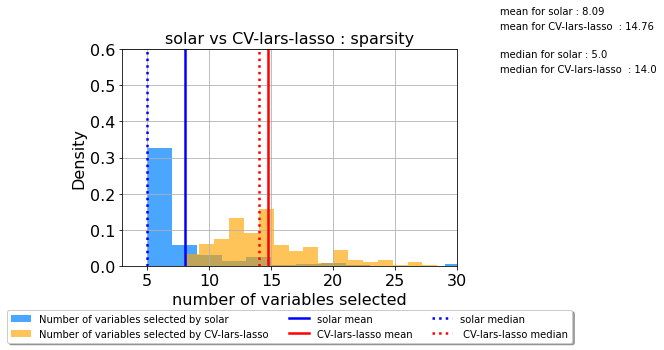

in 93 out of 200 solar pick more/less than 5 variables
in 200 out of 200 CV-lars-lasso  pick more/less than 5 variables
in 200 out of 200 CV-cd pick more/less than 5 variables


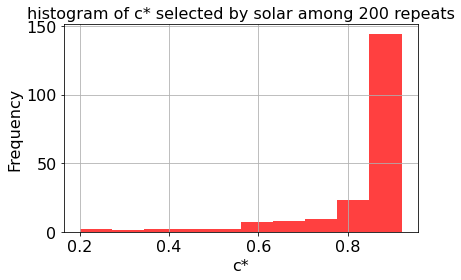

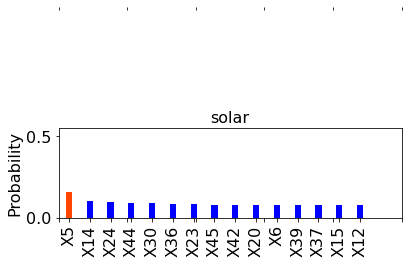

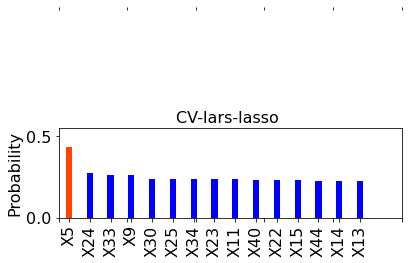

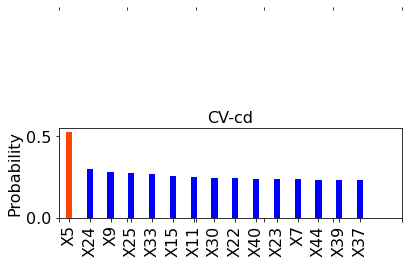

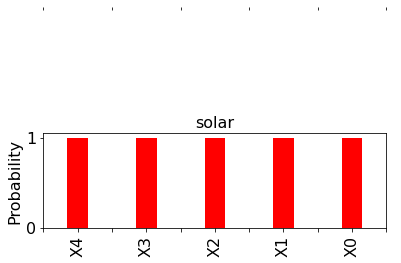

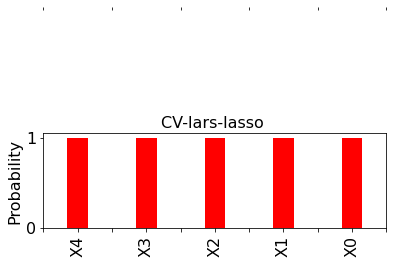

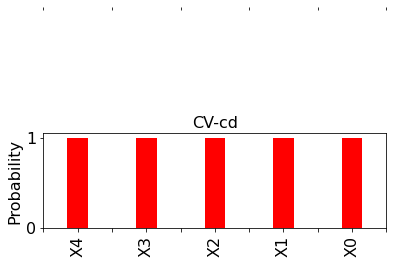

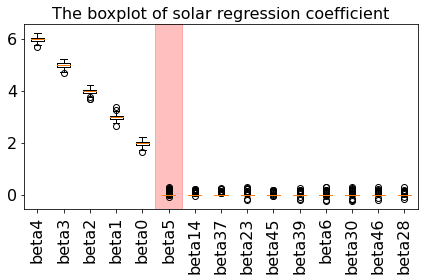

the number of non-zeros in the boxplot of beta_0:  200
the number of non-zeros in the boxplot of beta_1:  200
the number of non-zeros in the boxplot of beta_2:  200
the number of non-zeros in the boxplot of beta_3:  200
the number of non-zeros in the boxplot of beta_4:  200


In [8]:
func_simul(sample_size, n_dim, n_info, coef_1_2, coef_2_2, n_repeat, num_rep, step_size, rnd_seed, plot_on, repro)

## finally, produce the raw result into an HTML file

In [1]:
!rm -rf example_IRC.html
!jupyter nbconvert --to html example_IRC.ipynb 

[NbConvertApp] Converting notebook example_IRC.ipynb to html
[NbConvertApp] Writing 1146301 bytes to example_IRC.html
